https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center

Given is the variable name, variable type, the measurement unit and a brief description. The "Blood Transfusion Service Center" is a classification problem. The order of this listing corresponds to the order of numerals along the rows of the database. 

R (Recency - months since last donation), 
F (Frequency - total number of donation), 
M (Monetary - total blood donated in c.c.), 
T (Time - months since first donation), and 
a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 


Table 1 shows the descriptive statistics of the data. We selected 500 data at random as the training set, and the rest 248 as the testing set. 

Table 1. Descriptive statistics of the data 

Variable	Data Type	Measurement	Description	min	max	mean	std 
Recency quantitative	Months	Input	0.03	74.4	9.74	8.07 
Frequency quantitative	Times	Input	1	50	5.51	5.84 
Monetary	quantitative	c.c. blood	Input	250	12500	1378.68	1459.83 
Time quantitative	Months	Input	2.27	98.3	34.42	24.32 
Whether he/she donated blood in March 2007	binary	1=yes 0=no	Output	0	1	1 (24%) 0 (76%) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [3]:
blood = pd.read_csv('taiwan_blood.data')

In [4]:
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### One variable graphed in four different ways

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


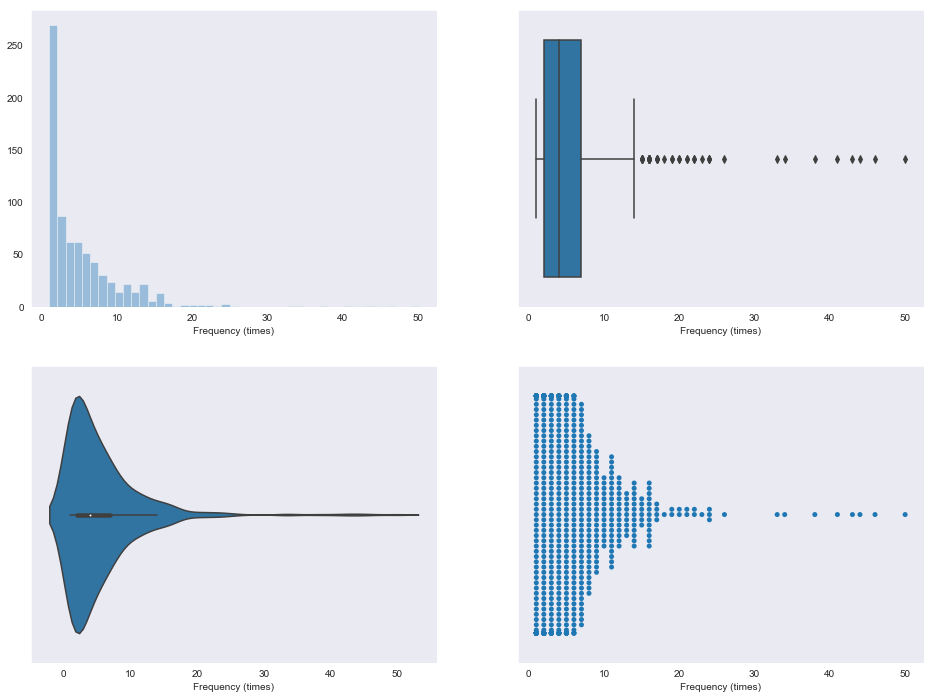

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12))
# ax[0, 1] = sns.violinplot(blood['Frequency (times)'], kde=False)
sns.distplot(blood['Frequency (times)'], kde=False, ax=ax1)
sns.boxplot(blood['Frequency (times)'], ax=ax2)
sns.violinplot(blood['Frequency (times)'], ax=ax3)
sns.swarmplot(blood['Frequency (times)'], ax=ax4)
plt.show()

#### Notes: one variable
The boxplot is advantageous in its simplicity. It gives the mean, interquartile range, and shows outliers. This is a nice and clean approach. The violinplot is also nice, being fairly simple to understand and clean - I prefer it with two different sides, but for this exercise it works.
### Two continuous variables in three ways

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


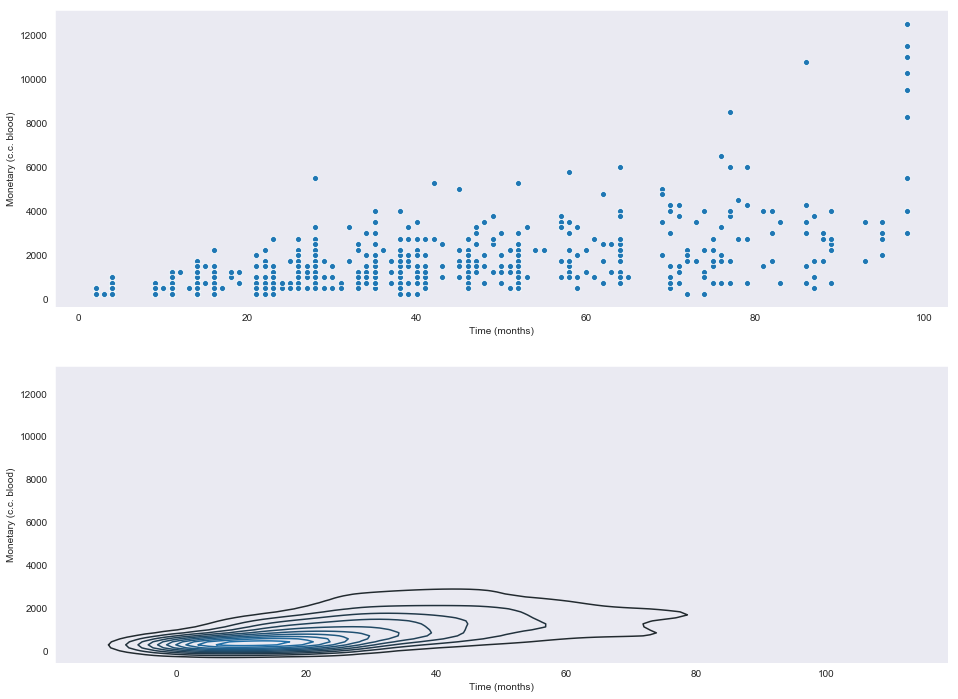

In [6]:
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(16,12))
sns.scatterplot(x=blood['Time (months)'], y=blood['Monetary (c.c. blood)'], ax=ax1)
sns.kdeplot(blood['Time (months)'], blood['Monetary (c.c. blood)'], ax=ax2)
# sns.relplot(x=blood['Time (months)'], y=blood['Monetary (c.c. blood)'], ax=ax3)
# ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
plt.show()

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


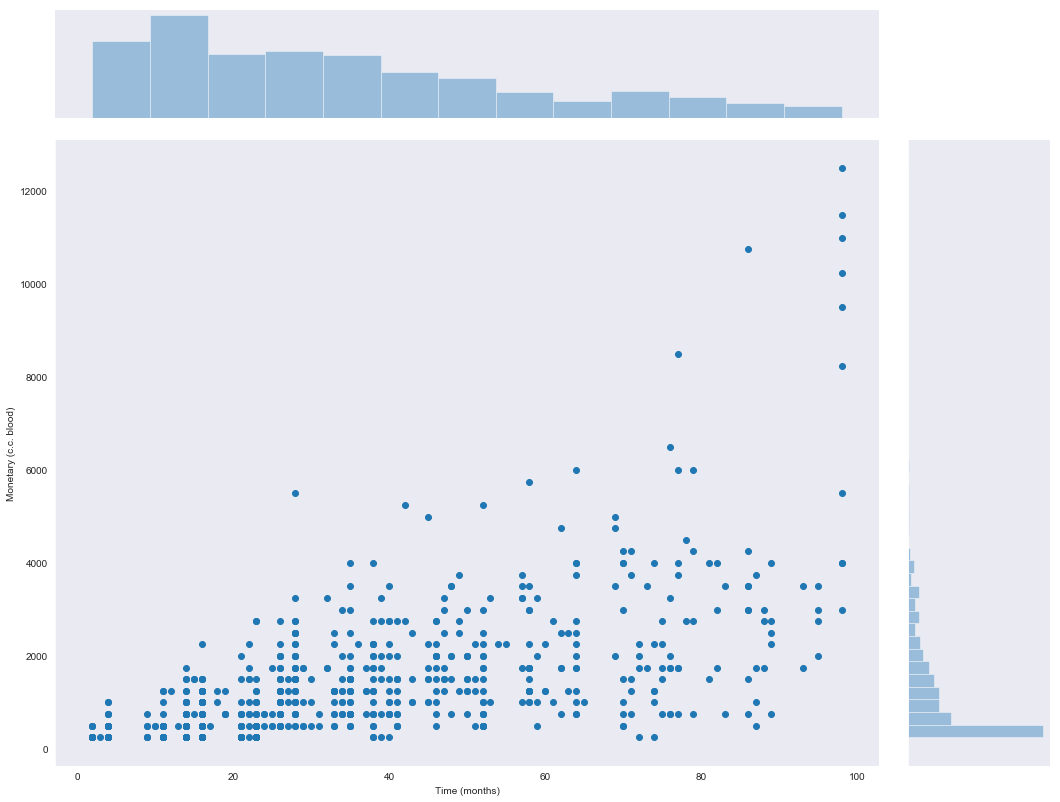

In [7]:
g = sns.jointplot(x=blood['Time (months)'], y=blood['Monetary (c.c. blood)'])
g.fig.set_size_inches(16, 12)

#### Notes: two continuous
The jointplot displays the same information in two different ways simultaneously. This is a great feature, and it does so while remaining very clear and understandable. It is my favorite from this set. The KDE plot tells a lot of the same information but does so in way that highlights dense and sparse spaces - also a great visual feature.
### One continuous and one categorical variable in six (five) ways

In [8]:
cont = blood['Monetary (c.c. blood)']
cat = blood['whether he/she donated blood in March 2007']

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


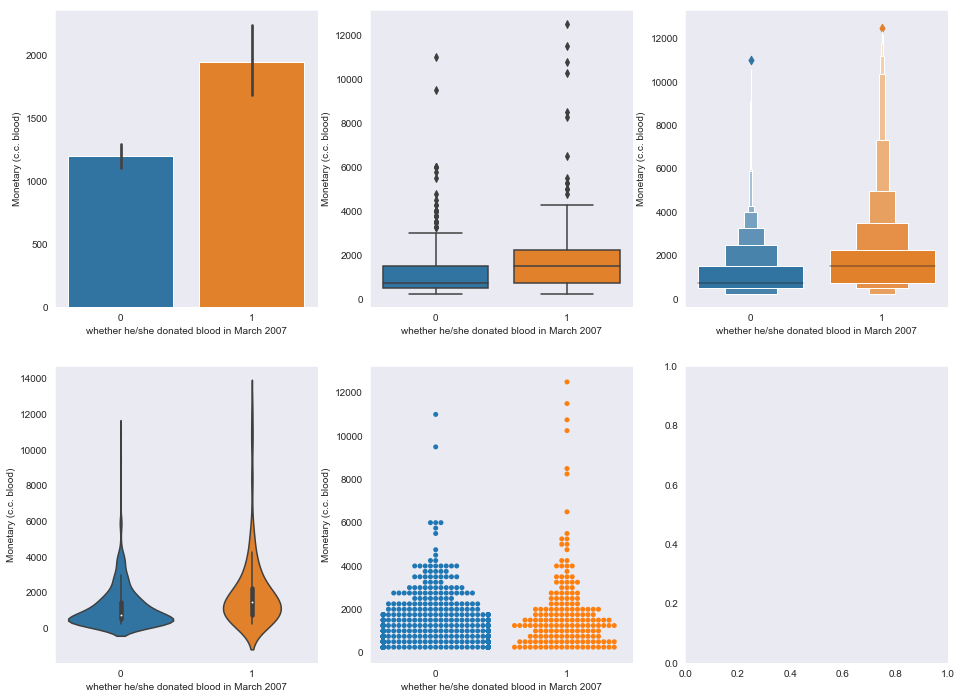

In [9]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16,12))
sns.barplot(x=cat, y=cont, ax=ax1)
sns.boxplot(x=cat, y=cont, ax=ax2)
sns.boxenplot(x=cat, y=cont, ax=ax3)
sns.violinplot(x=cat, y=cont, ax=ax4)
sns.swarmplot(x=cat, y=cont, ax=ax5)

#### Notes: one and one
The truth is these all tell nearly the same information in different setups (barring the plain boxplot). I still think the violinplot does probably the best job at this. The boxenplot is also visually attractive, but maybe because I really haven't seen it much before. I think the strength of the swarm plot is when it is combined with another visual - i.e. a boxplot.